In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [9]:
kb = 1.380649*(10**-23)
T = 295
beta = 1/(kb*T)

In [10]:
df = pd.read_csv('results/dataframes/filtered/hour.csv')
df.head()

,filename,radius,x,y,index
0,frame46006.jpg,19.235483,788.000000,407.000000,46006
1,frame20383.jpg,18.836752,786.594826,407.008621,20383
2,frame49335.jpg,18.309128,786.908028,402.810883,49335
3,frame10240.jpg,17.793230,786.695976,403.856781,10240
4,frame56215.jpg,18.137596,787.891304,407.978264,56215


In [11]:
conv = 2*df['radius'].values.mean()/(1.15)
df['x-um'] = (df['x'].values-df['x'].values.mean())*(1/conv)*10**-6
df['y-um'] = (df['y'].values-df['y'].values.mean())*(1/conv)*10**-6


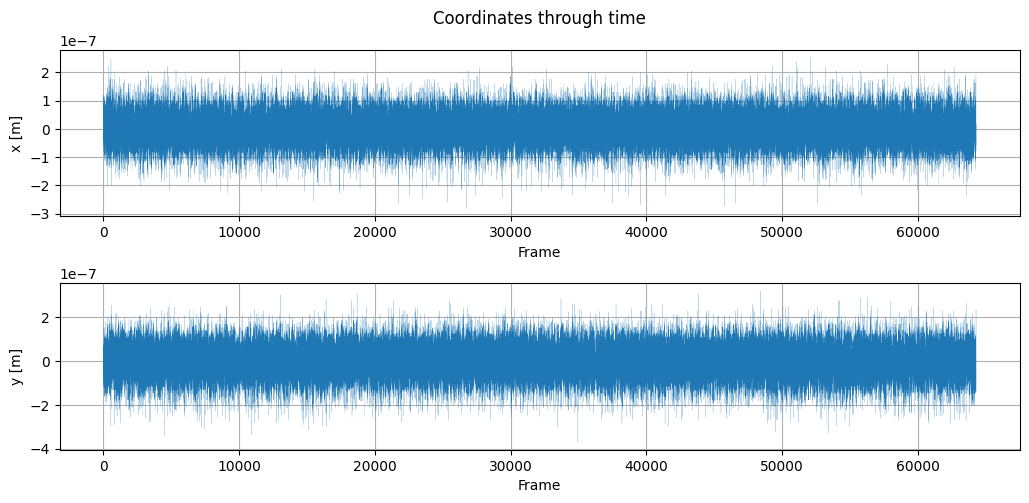

In [12]:
fig, axs = plt.subplots(2)
fig.set_figwidth(12)
fig.set_figheight(5)
fig.suptitle('Coordinates through time')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
axs[0].grid()
axs[0].set_xlabel('Frame')
axs[0].set_ylabel('x [m]')
axs[0].plot(df['x-um'].values, linewidth=0.1)
  
axs[1].grid()
axs[1].set_xlabel('Frame')
axs[1].set_ylabel('y [m]')
axs[1].plot(df['y-um'].values, linewidth=0.1)
plt.show()

In [13]:
df['r-um'] = np.sqrt(np.power(df['x-um'].values, 2)+np.power(df['y-um'].values, 2))
df.head()

,filename,radius,x,y,index,x-um,y-um,r-um
0,frame46006.jpg,19.235483,788.000000,407.000000,46006,2.409293e-08,4.993069e-08,5.543955e-08
1,frame20383.jpg,18.836752,786.594826,407.008621,20383,-1.846627e-08,5.019181e-08,5.348103e-08
2,frame49335.jpg,18.309128,786.908028,402.810883,49335,-8.980171e-09,-7.694716e-08,7.746940e-08
3,frame10240.jpg,17.793230,786.695976,403.856781,10240,-1.540268e-08,-4.526952e-08,4.781811e-08
4,frame56215.jpg,18.137596,787.891304,407.978264,56215,2.080080e-08,7.955985e-08,8.223407e-08


In [55]:
##Compute krho from explicit formula
2*kb*T/(np.power(df['r-um'].values, 4).mean())

42080013.42021322

In [123]:
N = 50
list_of_df = [df[int(i/N*len(df)):int((i+1)/N*len(df))] for i in range(N)]

In [104]:
def prob_distr(x, krho):
    kb = 1.380649*(10**-23)
    T = 293
    beta = 1/(kb*T)
    return 4*np.sqrt((4*beta*krho)/np.pi)*x*np.exp(-4*beta*krho*np.power(x,4))

/tmp/ipykernel_19151/4077588157.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((list_of_df[0]['r-um'].values), hist=True, kde=False,
/tmp/ipykernel_19151/4077588157.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((list_of_df[1]['r-um'].values), hist=True, kde=False,
/tmp/ipykernel_191

Text(0, 0.5, 'Count')

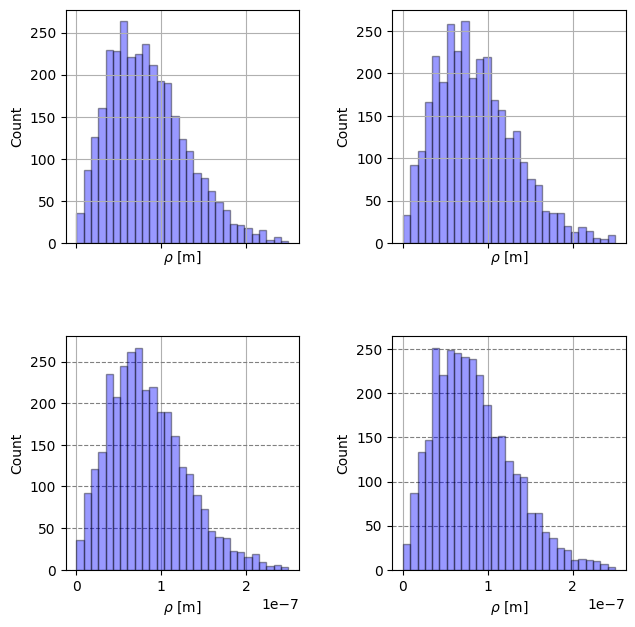

In [105]:
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0, 0].grid()
axes[0, 1].grid()
axes[1, 0].grid()
axes[1, 1].grid()
fig.suptitle('Radius distribution')
sns.distplot((list_of_df[0]['r-um'].values), hist=True, kde=False, 
             bins=np.linspace(0, 25*10**-8, 30), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax=axes[0, 0])

sns.distplot((list_of_df[1]['r-um'].values), hist=True, kde=False, 
             bins=np.linspace(0, 25*10**-8, 30), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax=axes[0, 1])

sns.distplot((list_of_df[2]['r-um'].values), hist=True, kde=False, 
             bins=np.linspace(0, 25*10**-8, 30), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax=axes[1, 0])
axes[1, 0].set_axisbelow(True)
axes[1, 0].yaxis.grid(color='gray', linestyle='dashed')
axes[1, 0].set_xlabel('Frame')
axes[1, 0].set_ylabel(r'$\rho$ [m]')
sns.distplot((list_of_df[3]['r-um'].values), hist=True, kde=False, 
             bins=np.linspace(0, 25*10**-8, 30), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax=axes[1, 1])
axes[1, 1].set_axisbelow(True)
axes[1, 1].yaxis.grid(color='gray', linestyle='dashed')
axes[0, 0].set_xlabel(r'$\rho$ [m]')
axes[0, 1].set_xlabel(r'$\rho$ [m]')
axes[1, 0].set_xlabel(r'$\rho$ [m]')
axes[1, 1].set_xlabel(r'$\rho$ [m]')
axes[0, 0].set_ylabel('Count')
axes[0, 1].set_ylabel('Count')
axes[1, 0].set_ylabel('Count')
axes[1, 1].set_ylabel('Count')

In [134]:
xs = np.zeros((99, N))
widths = np.zeros((99, N))
heights = np.zeros((99, N))


for i, sub_df in enumerate(list_of_df):
    patches = sns.distplot(sub_df['r-um'].values, hist=True, kde=False, 
                 bins=np.linspace(0, 35*10**-8, 100), color = 'blue',
                 hist_kws={'edgecolor':'black'}).patches
    height = [patch.get_height() for patch in patches]
    x = [patch.get_x() for patch in patches]
    width = [patch.get_width() for patch in patches]
    x = np.array(x) + 0.5*np.array(width)
    xs[:,i] = x
    widths[:,i] = width
    heights[:,i] = height
    plt.clf()

/tmp/ipykernel_19151/633932649.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  patches = sns.distplot(sub_df['r-um'].values, hist=True, kde=False,


<Figure size 640x480 with 0 Axes>

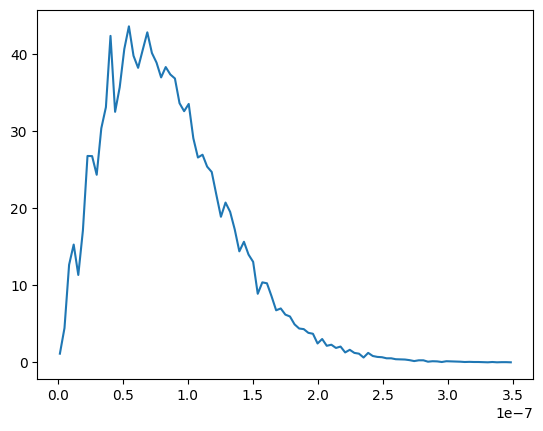

In [135]:
plt.plot(xs.mean(axis=1), heights.mean(axis=1))
plt.show()

In [136]:
normalized_y = np.array(heights.mean(axis=1))/(np.array(heights.mean(axis=1))*np.array(widths.mean(axis=1))).sum()
(np.array(normalized_y)*np.array(widths.mean(axis=1))).sum()

0.9999999999999998

In [137]:
k_rho_fit, _ = curve_fit(prob_distr, xs.mean(axis=1), normalized_y, bounds=(0, [10**10]))
k_rho_fit

array([5260762.04099703])

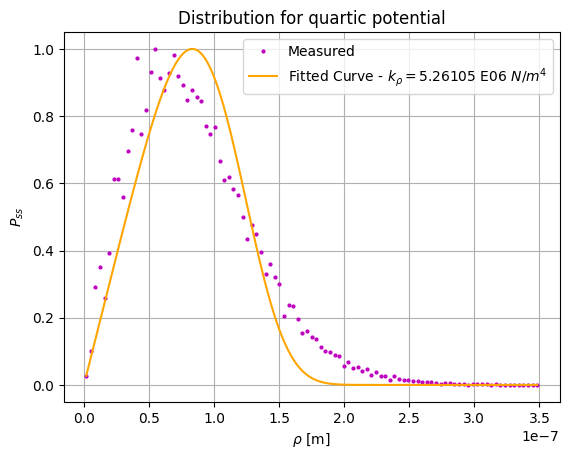

In [138]:
plt.plot(xs.mean(axis=1), normalized_y/max(normalized_y), 'mo', markersize=2)
#plt.plot(xs, prob_distr(xs, krho)/max(prob_distr(xs, krho)), 'orange')
xs2 = np.linspace(xs.mean(axis=1)[0], xs.mean(axis=1)[-1],1000)
plt.plot(xs2, prob_distr(xs2, k_rho_fit)/max(prob_distr(xs2, k_rho_fit)), 'orange')
plt.legend(['Measured', r'Fitted Curve - $k_\rho=5.26105$ E06 $N/m^4$'])
plt.xlabel(r'$\rho$ [m]')
plt.ylabel(r'$P_{ss}$')
plt.title('Distribution for quartic potential')

plt.grid()
plt.show()

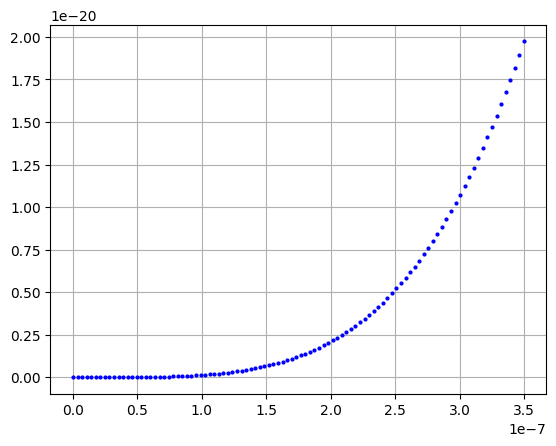

In [111]:
plt.plot(np.linspace(0,3.5e-7,100), 0.25*k_rho_fit*np.power(np.linspace(0,3.5e-7,100),4), 'bo', markersize=2)
#plt.plot(xs, prob_distr(xs, krho)/max(prob_distr(xs, krho)), 'orange')

plt.grid()
plt.show()

In [ ]:
def prob_distr(x, krho):
    kb = 1.380649*(10**-23)
    T = 295
    beta = 1/(kb*T)
    return 4*np.sqrt((4*beta*krho)/np.pi)*x*np.exp(-4*beta*krho*np.power(x, 4))

In [126]:
k_rhos = []
for sub_df in list_of_df:
    patches = sns.distplot(sub_df['r-um'].values, hist=True, kde=False, 
                 bins=np.linspace(0, 35*10**-8, 100), color = 'blue',
                 hist_kws={'edgecolor':'black'}).patches
    heights = [patch.get_height() for patch in patches]
    xs = [patch.get_x() for patch in patches]
    widths = [patch.get_width() for patch in patches]
    xs = np.array(xs) + 0.5*np.array(widths)
    print(heights)
    normalized_y = np.array(heights)/(np.array(heights)*np.array(widths)).sum()
    k_rho_fit, _ = curve_fit(prob_distr, xs, normalized_y, bounds=(0, [10**8]))
    k_rhos.append(k_rho_fit[0])
    plt.clf()

/tmp/ipykernel_19151/3623474758.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  patches = sns.distplot(sub_df['r-um'].values, hist=True, kde=False,


[1.0, 8.0, 12.0, 14.0, 15.0, 17.0, 23.0, 23.0, 28.0, 31.0, 33.0, 45.0, 33.0, 39.0, 42.0, 55.0, 23.0, 31.0, 28.0, 36.0, 46.0, 29.0, 37.0, 46.0, 35.0, 35.0, 32.0, 35.0, 28.0, 44.0, 26.0, 33.0, 31.0, 24.0, 24.0, 13.0, 26.0, 14.0, 19.0, 13.0, 21.0, 13.0, 15.0, 5.0, 17.0, 11.0, 11.0, 7.0, 6.0, 5.0, 6.0, 4.0, 6.0, 1.0, 4.0, 2.0, 2.0, 4.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[2.0, 7.0, 22.0, 15.0, 8.0, 16.0, 27.0, 29.0, 27.0, 38.0, 34.0, 35.0, 36.0, 28.0, 39.0, 49.0, 42.0, 51.0, 37.0, 36.0, 36.0, 31.0, 47.0, 30.0, 36.0, 40.0, 42.0, 31.0, 25.0, 33.0, 25.0, 31.0, 22.0, 20.0, 23.0, 18.0, 22.0, 18.0, 12.0, 11.0, 14.0, 12.0, 13.0, 11.0, 11.0, 6.0, 8.0, 8.0, 9.0, 4.0, 12.0, 6.0, 1.0, 3.0, 7.0, 2.0, 8.0, 1.0, 1.0, 3.0, 1.0, 1.0, 5.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0

[1.0, 3.0, 11.0, 10.0, 11.0, 24.0, 22.0, 37.0, 30.0, 34.0, 29.0, 42.0, 33.0, 42.0, 37.0, 49.0, 38.0, 32.0, 43.0, 40.0, 56.0, 27.0, 45.0, 29.0, 39.0, 46.0, 28.0, 26.0, 36.0, 24.0, 31.0, 31.0, 23.0, 28.0, 29.0, 15.0, 15.0, 22.0, 18.0, 14.0, 12.0, 15.0, 9.0, 10.0, 8.0, 11.0, 10.0, 4.0, 6.0, 5.0, 7.0, 3.0, 3.0, 4.0, 5.0, 3.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[3.0, 2.0, 8.0, 17.0, 9.0, 17.0, 29.0, 24.0, 23.0, 33.0, 43.0, 44.0, 37.0, 33.0, 37.0, 45.0, 44.0, 37.0, 36.0, 46.0, 45.0, 42.0, 35.0, 44.0, 34.0, 32.0, 45.0, 33.0, 28.0, 34.0, 31.0, 24.0, 18.0, 18.0, 23.0, 21.0, 30.0, 16.0, 18.0, 10.0, 14.0, 15.0, 7.0, 4.0, 8.0, 13.0, 3.0, 8.0, 10.0, 5.0, 2.0, 8.0, 3.0, 4.0, 3.0, 4.0, 2.0, 6.0, 2.0, 0.0, 1.0, 3.0, 2.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

[0.0, 6.0, 11.0, 18.0, 8.0, 11.0, 27.0, 37.0, 27.0, 33.0, 28.0, 43.0, 34.0, 34.0, 35.0, 52.0, 31.0, 41.0, 33.0, 47.0, 45.0, 47.0, 31.0, 31.0, 43.0, 32.0, 28.0, 33.0, 28.0, 26.0, 27.0, 26.0, 24.0, 25.0, 20.0, 14.0, 34.0, 16.0, 12.0, 15.0, 15.0, 15.0, 17.0, 9.0, 8.0, 10.0, 10.0, 6.0, 15.0, 10.0, 10.0, 5.0, 6.0, 5.0, 1.0, 4.0, 2.0, 5.0, 0.0, 3.0, 4.0, 3.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 8.0, 11.0, 12.0, 12.0, 21.0, 24.0, 30.0, 18.0, 24.0, 35.0, 55.0, 37.0, 23.0, 43.0, 48.0, 40.0, 37.0, 27.0, 45.0, 38.0, 41.0, 46.0, 49.0, 38.0, 43.0, 25.0, 32.0, 34.0, 27.0, 22.0, 18.0, 25.0, 32.0, 27.0, 15.0, 15.0, 13.0, 14.0, 16.0, 13.0, 13.0, 13.0, 15.0, 11.0, 17.0, 12.0, 6.0, 6.0, 7.0, 3.0, 6.0, 3.0, 4.0, 5.0, 5.0, 2.0, 4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0

<Figure size 640x480 with 0 Axes>

In [132]:
print(np.array(k_rhos).mean(), np.array(k_rhos).std())

5282602.846692901 460235.12847061764


In [128]:
xs = np.linspace(0,3.5*10**-7, 50)
Us = np.zeros((len(k_rhos), 50))

for i in range(Us.shape[0]):
    Us[i,:] =  0.25*k_rhos[i]*np.power(xs,4)

In [129]:
first_q = np.quantile(Us, q=0.25, axis=0)
median = np.quantile(Us, q=0.5, axis=0)
third_q = np.quantile(Us, q=0.75, axis=0)
dq = third_q-first_q
upper = 1.5*dq+third_q-median
bottom = median-(first_q-dq)
yerror = 0.5*(upper+bottom)

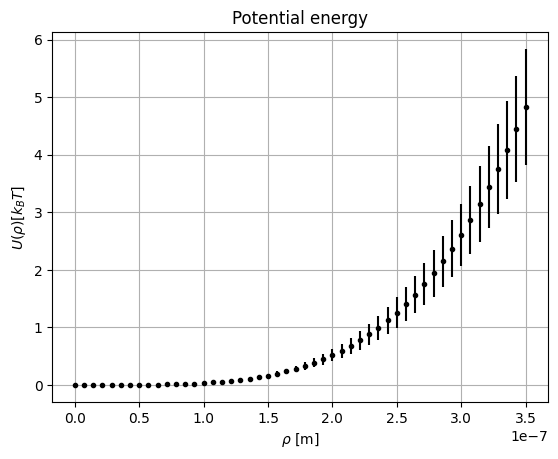

In [130]:
plt.errorbar(np.linspace(0, 3.5*10**-7, 50), np.quantile(Us, q=0.5, axis=0)/(kb*T), yerr=yerror/(kb*T), fmt='.k')
plt.xlabel(r'$\rho$ [m]')
plt.ylabel(r'$U(\rho)[k_BT]$')
plt.title('Potential energy')

plt.grid()
plt.show()